In [30]:
import pandas as pd
import matplotlib.pyplot as plt

In [31]:
df = pd.read_csv('muay_thai/data/15.csv')
df[['clip_name', 'threshold', 'left_index_x', 'left_index_y', 'right_index_x', 'right_index_y']].head(9)

,clip_name,threshold,left_index_x,left_index_y,right_index_x,right_index_y
0,15_1,10,0.544166,0.458165,0.511471,0.419094
1,15_1,20,0.545551,0.467120,0.509140,0.419704
2,15_1,30,0.562433,0.372671,0.506123,0.435827
3,15_1,40,0.579780,0.324122,0.576346,0.320442
4,15_1,50,0.549371,0.520057,0.565075,0.521640
5,15_1,60,0.581117,0.415823,0.565254,0.418932
6,15_1,70,0.558997,0.447245,0.536606,0.438140
7,15_1,80,0.514204,0.488501,0.496259,0.460905
8,15_1,90,0.540936,0.489083,0.501790,0.454551


## Example 1

In [32]:
df2 = df.iloc[0:9][['left_index_x', 'left_index_y', 'right_index_x', 'right_index_y']].diff()

In [33]:
df2.dropna(how='all', inplace=True)

In [34]:
df2

,left_index_x,left_index_y,right_index_x,right_index_y
1,0.001385,0.008955,-0.002331,0.000610
2,0.016883,-0.094450,-0.003017,0.016123
3,0.017347,-0.048549,0.070223,-0.115385
4,-0.030409,0.195935,-0.011271,0.201198
5,0.031746,-0.104233,0.000179,-0.102708
6,-0.022120,0.031422,-0.028647,0.019207
7,-0.044793,0.041256,-0.040347,0.022766
8,0.026732,0.000583,0.005531,-0.006354


In [35]:
df2['left_index_x_pow'] = df2['left_index_x'].pow(2)
df2['left_index_y_pow'] = df2['left_index_y'].pow(2)

df2['right_index_x_pow'] = df2['right_index_x'].pow(2)
df2['right_index_y_pow'] = df2['right_index_y'].pow(2)

In [36]:
df2['left_index'] = (df2['left_index_x_pow'] + df2['left_index_y_pow']) ** (1/2)
df2['right_index'] = (df2['right_index_x_pow'] + df2['right_index_y_pow']) ** (1/2)

In [37]:
df2[['left_index', 'right_index']]

,left_index,right_index
1,0.009061,0.002410
2,0.095947,0.016403
3,0.051555,0.135074
4,0.198280,0.201513
5,0.108961,0.102708
6,0.038427,0.034491
7,0.060897,0.046327
8,0.026738,0.008424


In [38]:
df3 = df.groupby('clip_name')[['left_index_x', 'left_index_y']].diff().head(50)

Test

In [39]:
df = df.iloc[:,1:]
df

,clip_name,threshold,nose_x,nose_y,nose_z,left_eye_inner_x,left_eye_inner_y,left_eye_inner_z,left_eye_x,left_eye_y,...,left_heel_z,right_heel_x,right_heel_y,right_heel_z,left_foot_index_x,left_foot_index_y,left_foot_index_z,right_foot_index_x,right_foot_index_y,right_foot_index_z
0,15_1,10,0.525365,0.395499,-0.161946,0.531086,0.383866,-0.154151,0.534204,0.384243,...,0.024796,0.525554,0.898099,0.288590,0.579619,0.950502,-0.078330,0.492190,0.910071,0.224562
1,15_1,20,0.524871,0.397191,-0.148097,0.530513,0.386210,-0.137894,0.533568,0.386648,...,-0.012508,0.525853,0.897498,0.278630,0.580643,0.950453,-0.115475,0.493373,0.910171,0.212166
2,15_1,30,0.526434,0.405888,-0.130820,0.531090,0.394587,-0.118637,0.533603,0.394887,...,-0.109120,0.526747,0.900650,0.202649,0.582798,0.949098,-0.203603,0.492542,0.909117,0.151335
3,15_1,40,0.559172,0.395419,-0.189590,0.564440,0.383618,-0.173697,0.567123,0.383303,...,0.065342,0.516364,0.824911,0.357811,0.596636,0.987389,-0.030794,0.512559,0.891527,0.319445
4,15_1,50,0.561765,0.450337,-0.000826,0.566169,0.436745,0.015066,0.569329,0.436288,...,-0.095114,0.576204,0.770964,-0.303447,0.603120,0.988746,-0.180812,0.580363,0.776422,-0.385855
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247,15_27,80,0.532180,0.261991,-0.031264,0.528506,0.249030,-0.021699,0.527789,0.248728,...,0.153261,0.517813,0.785919,-0.033045,0.500585,0.769054,0.133064,0.557398,0.791779,-0.056552
248,15_27,90,0.532303,0.255423,-0.031128,0.527180,0.243024,-0.022845,0.526292,0.242760,...,0.251646,0.500720,0.802095,0.041929,0.495495,0.760728,0.230183,0.543327,0.801657,-0.000022
249,15_27,100,0.542129,0.262694,-0.047968,0.537814,0.249251,-0.041310,0.536930,0.248855,...,0.315135,0.499863,0.805880,0.080747,0.503849,0.758291,0.293703,0.541830,0.804540,0.042457
250,15_27,110,0.523422,0.267955,-0.068337,0.519318,0.254087,-0.060384,0.518664,0.253720,...,0.238151,0.502170,0.801177,0.047185,0.495917,0.759646,0.221384,0.544297,0.804353,0.016204


In [40]:
df4 = df.set_index(['clip_name','threshold'])

In [41]:
df4 = df4.groupby('clip_name').diff()

In [42]:
df4.dropna(how='all', inplace=True)

In [43]:
bodies = ['nose', 'left_eye_inner', 'left_eye', 'left_eye_outer', 'right_eye_inner', 'right_eye', 'right_eye_outer',
          'left_ear', 'right_ear', 'mouth_left', 'mouth_right', 'left_shoulder', 'right_shoulder', 'left_elbow', 'right_elbow',
          'left_wrist', 'right_wrist', 'left_pinky', 'right_pinky', 'left_index', 'right_index', 'left_thumb', 'right_thumb',
          'left_hip', 'right_hip', 'left_knee', 'right_knee', 'left_ankle', 'right_ankle', 'left_heel', 'right_heel',
          'left_foot_index', 'right_foot_index']
delete_column = []
for body in bodies:
  delete_column.append('{}_z'.format(body))

In [44]:
df4.drop(columns=delete_column, inplace=True)

In [45]:
for body in bodies:
  df4[body] = (df4['{}_x'.format(body)].pow(2) + df4['{}_y'.format(body)].pow(2)) ** (1/2)

In [46]:
df5 = df4[bodies]

In [47]:
df5.reset_index(level='threshold', inplace=True)

In [48]:
value_dict = {}
count = 1
for i in range(20,200,10):
  value_dict[i] = count
  count+=1
value_dict

{20: 1,
 30: 2,
 40: 3,
 50: 4,
 60: 5,
 70: 6,
 80: 7,
 90: 8,
 100: 9,
 110: 10,
 120: 11,
 130: 12,
 140: 13,
 150: 14,
 160: 15,
 170: 16,
 180: 17,
 190: 18}

In [49]:
df5.replace({'threshold':value_dict}, inplace=True)

D:\anaconda3\lib\site-packages\pandas\core\indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [50]:
# df5.reset_index(inplace=True)

In [51]:
# clip_ls = []
# for i in range(1,28):
#   clip_ls.append('15_{}'.format(i))

In [52]:
df5.head(30)

,threshold,nose,left_eye_inner,left_eye,left_eye_outer,right_eye_inner,right_eye,right_eye_outer,left_ear,right_ear,...,left_hip,right_hip,left_knee,right_knee,left_ankle,right_ankle,left_heel,right_heel,left_foot_index,right_foot_index
clip_name,,,,,,,,,,,,,,,,,,,,,
15_1,1,0.001763,0.002413,0.002488,0.002343,0.002248,0.002222,0.002194,0.001771,0.001642,...,0.001577,0.000624,0.001066,0.002311,0.000148,0.000235,0.000803,0.000671,0.001024,0.001187
15_1,2,0.008836,0.008397,0.008239,0.008002,0.007356,0.006424,0.005320,0.005877,0.003083,...,0.007465,0.004162,0.007180,0.002924,0.010721,0.001160,0.014039,0.003276,0.002546,0.001342
15_1,3,0.034371,0.035107,0.035465,0.035846,0.034953,0.035142,0.035128,0.033804,0.034136,...,0.031196,0.021191,0.046535,0.025024,0.026973,0.050025,0.022116,0.076447,0.040716,0.026647
15_1,4,0.054978,0.053155,0.053031,0.053039,0.055027,0.056247,0.057759,0.053027,0.059557,...,0.017652,0.018621,0.015570,0.248624,0.007402,0.105529,0.015320,0.080568,0.006624,0.133591
15_1,5,0.054096,0.052208,0.052094,0.051967,0.052563,0.052840,0.053099,0.050518,0.051548,...,0.007926,0.007329,0.002257,0.239074,0.002199,0.138838,0.004576,0.115972,0.003535,0.167436
15_1,6,0.031522,0.030251,0.029413,0.028141,0.030015,0.028973,0.028740,0.025289,0.026601,...,0.032981,0.035108,0.023243,0.054145,0.001869,0.045526,0.002964,0.042023,0.004609,0.060330
15_1,7,0.027802,0.027193,0.027438,0.027987,0.025626,0.025022,0.024399,0.029106,0.022871,...,0.029736,0.025925,0.025488,0.007646,0.021339,0.013200,0.023574,0.020661,0.011313,0.001128
15_1,8,0.018507,0.019164,0.018760,0.018524,0.019478,0.018914,0.018870,0.019385,0.017935,...,0.008955,0.006171,0.004206,0.001823,0.009645,0.000872,0.011152,0.001320,0.012862,0.006081
15_2,1,0.015726,0.016461,0.016816,0.016977,0.016050,0.015815,0.014805,0.016064,0.013030,...,0.007199,0.007511,0.010702,0.001527,0.013711,0.002554,0.019573,0.003884,0.028481,0.001163


In [53]:
total_mean_df = df5.groupby('threshold')[bodies].mean()

In [54]:
total_mean_df.reset_index(inplace=True)
total_mean_df.drop(10, inplace=True)

In [55]:
total_mean_df

,threshold,nose,left_eye_inner,left_eye,left_eye_outer,right_eye_inner,right_eye,right_eye_outer,left_ear,right_ear,...,left_hip,right_hip,left_knee,right_knee,left_ankle,right_ankle,left_heel,right_heel,left_foot_index,right_foot_index
0,1,0.011589,0.011399,0.011139,0.010816,0.011477,0.011276,0.010986,0.008341,0.008380,...,0.005525,0.005064,0.008745,0.009645,0.004298,0.005203,0.004594,0.005495,0.006223,0.005193
1,2,0.021282,0.021406,0.021103,0.020790,0.021814,0.021825,0.021741,0.019909,0.020940,...,0.024019,0.027332,0.029234,0.031161,0.025700,0.030972,0.028758,0.034440,0.024051,0.028855
2,3,0.028509,0.027813,0.027823,0.027835,0.027846,0.027879,0.027931,0.027408,0.027199,...,0.047400,0.047257,0.087343,0.110562,0.074636,0.104151,0.075170,0.103789,0.076543,0.099809
3,4,0.028590,0.027360,0.027280,0.027186,0.027343,0.027221,0.027089,0.025600,0.024937,...,0.017634,0.019037,0.067649,0.067909,0.049712,0.049817,0.047074,0.045546,0.058488,0.056759
4,5,0.036573,0.036808,0.036633,0.036390,0.036887,0.036736,0.036594,0.034078,0.034438,...,0.024381,0.027315,0.085332,0.102092,0.062971,0.078187,0.059902,0.073364,0.069230,0.083779
5,6,0.026368,0.025502,0.025345,0.025190,0.025630,0.025551,0.025432,0.023959,0.024629,...,0.040397,0.041671,0.048618,0.054244,0.034668,0.041576,0.040309,0.046611,0.026382,0.037712
6,7,0.015649,0.015048,0.014959,0.014934,0.015109,0.015048,0.014989,0.014766,0.014949,...,0.019834,0.019404,0.019428,0.021030,0.019373,0.022361,0.021938,0.025560,0.019879,0.022199
7,8,0.018427,0.018324,0.018304,0.018252,0.018309,0.018194,0.017916,0.017860,0.017307,...,0.012108,0.011369,0.012965,0.011136,0.009287,0.007608,0.010191,0.007752,0.010829,0.006633
8,9,0.019267,0.019645,0.019703,0.019782,0.019592,0.019628,0.019904,0.020202,0.020540,...,0.010467,0.011379,0.008611,0.009273,0.010437,0.005745,0.011549,0.006003,0.012470,0.008919
9,10,0.022779,0.023178,0.023278,0.023186,0.023417,0.023663,0.023807,0.022581,0.023112,...,0.012875,0.009541,0.012578,0.009035,0.007548,0.007399,0.007868,0.008064,0.005335,0.005122


In [57]:
heads = ['nose', 'left_eye_inner', 'left_eye', 'left_eye_outer', 'right_eye_inner', 'right_eye', 'right_eye_outer',
          'left_ear', 'right_ear', 'mouth_left', 'mouth_right']
no_heads = ['left_shoulder', 'right_shoulder', 'left_elbow', 'right_elbow',
          'left_wrist', 'right_wrist', 'left_pinky', 'right_pinky', 'left_index', 'right_index', 'left_thumb', 'right_thumb',
          'left_hip', 'right_hip', 'left_knee', 'right_knee', 'left_ankle', 'right_ankle', 'left_heel', 'right_heel',
          'left_foot_index', 'right_foot_index']

In [58]:
total_mean_df.drop(columns=heads, inplace=True)

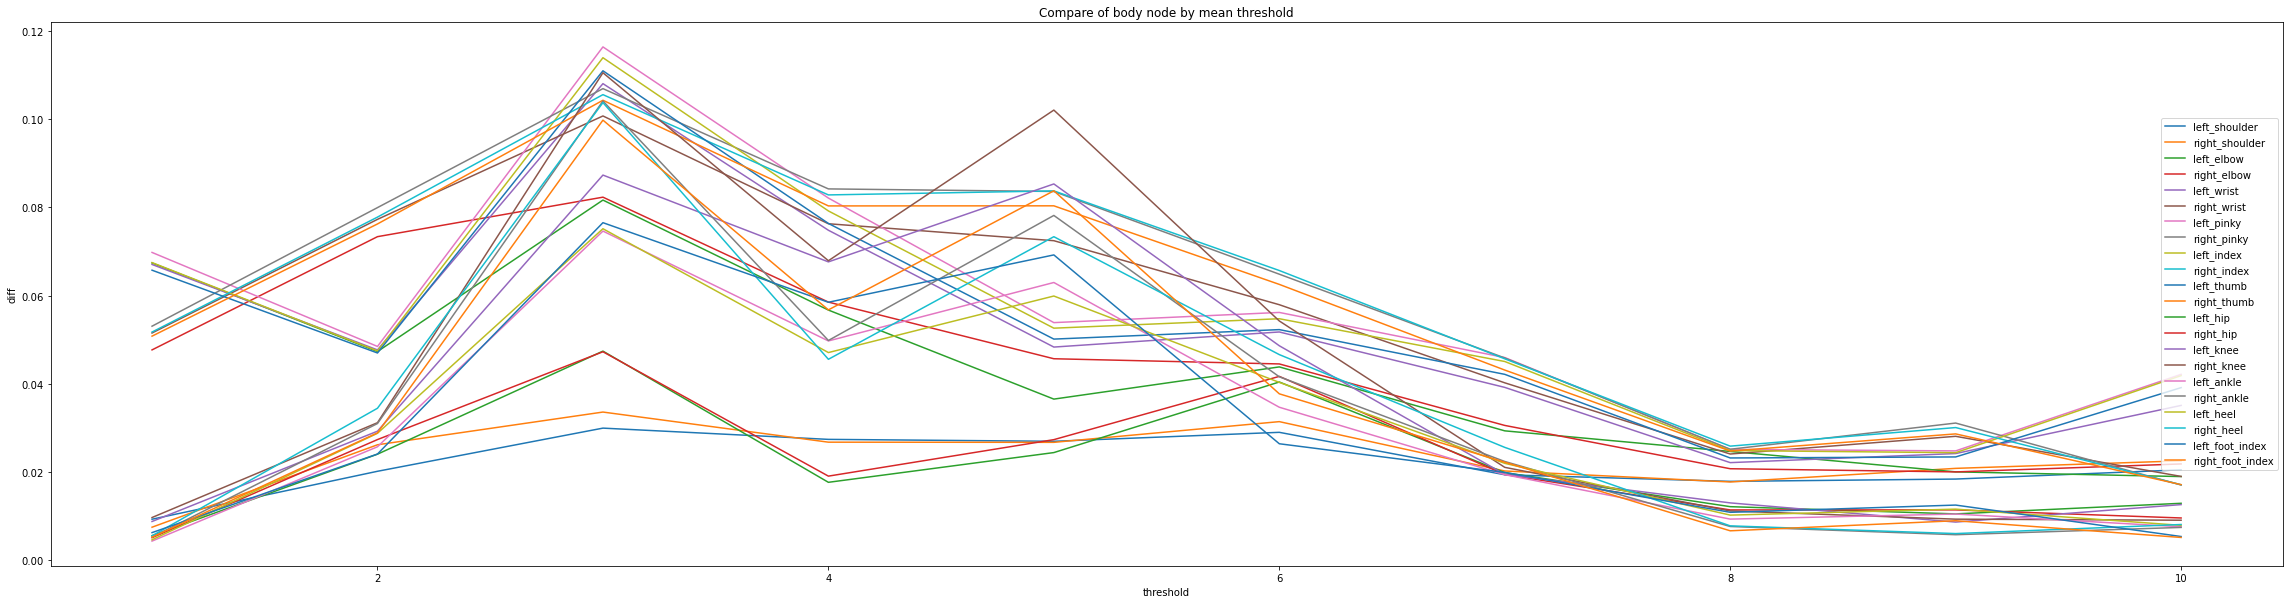

In [59]:
plt.figure(figsize=(40, 10))

for body in no_heads:
    plt.plot(total_mean_df.index+1, total_mean_df[body], label=body)

plt.title('Compare of body node by mean threshold')
plt.xlabel('threshold')
plt.ylabel('diff')
plt.legend(loc='right')
plt.show()